## Machine Learning Classification Model for Heart Disease Prediction.

All the required libraries will be imported.

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import make_scorer
from sklearn.svm import SVC, SVR
from scipy.stats import lognorm, loguniform, randint
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Introduction
Heart disease remains one of the deadliest conditions worldwide. In Canada, one in twelve adults over the age of 20 lives with heart disease, making it the second leading cause of death in the country (Government of Canada, 2022). The economic impact is also substantial, with more than $21 billion spent annually in direct and indirect health-care costs (Heart & Stroke Foundation of Canada).

The aim of this project was to develop a supervised machine learning model capable of predicting whether a patient has heart disease or is classified as normal, based on a combination of numerical, categorical, and binary features. The expected outcome is a model that accurately identifies the majority of heart disease cases while maintaining good generalization performance on unseen data.

Since the target variable (HeartDisease) consists of discrete categories—0 representing a normal condition and 1 indicating the presence of heart disease—this problem is formulated within the framework of supervised machine learning as a binary classification task.



## Exploratory Data Analysis
The dataset will be loaded and some initial information will be gathered.

In [2]:
hf_pred = pd.read_csv('copy_heart_failure_prediction.csv')
hf_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset contains 918 observations and 12 variables, including a binary target variable representing heart disease status. The data include numerical, categorical, and binary features, with no missing values observed across any variables. This completeness makes the dataset well-suited for supervised machine learning, with feature variability handled during preprocessing and modeling. 

In [3]:
#Table 1 Heart Disease Dataset variables.
hf_pred.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The table above shows that the dataset contains no missing values across all variables. Among the explanatory features, five variables are numerical, three are binary predictors, and three are categorical variables with multiple levels. The target variable (HeartDisease) is binary, indicating normal status (0) or presence of heart disease (1).

### Exploratory Visualizations
To better understand the structure and characteristics of the dataset, a series of exploratory visualizations were created. A custom function (plot_value_counts) was developed to summarize feature distributions by counting category occurrences and generating bar charts. These visualizations enabled a clear assessment of category frequencies, potential class imbalance, and overall feature diversity within the dataset.

The exploratory analysis revealed that most categorical and binary features were reasonably well balanced, while several numerical variables exhibited moderate variability across patients. These findings informed subsequent preprocessing decisions and model selection. A concise summary of the main observed trends is presented below.

In [4]:
# Figure 1: Patients age counts
from plot_value_counts import plot_value_counts
plot_chart1= plot_value_counts(hf_pred, 'Age', color='blue', title="Patients age vs. age counts",
                               x_title= 'Patients age')
plot_chart1

alt.Chart(...)

In [5]:
#Figure 2: Patients sex distribution.
plot_chart2= plot_value_counts(hf_pred, 'Sex', color='orange', title="Patients sex counts",
                               x_title= 'Patients sex type')
plot_chart2

alt.Chart(...)

In [6]:
#Figure 3: Patients Chest pain type.
plot_chart3= plot_value_counts(hf_pred, 'ChestPainType', color='green', title="Patients chest pain counts",
                               x_title= 'Patients Chest pain type')
plot_chart3

alt.Chart(...)

In [7]:
#Figure 4: Patients resting blood pressure counts.
plot_chart4= plot_value_counts(hf_pred, 'RestingBP', color='magenta', title="Patients resting blood pressure counts",
                               x_title= 'Patients resting blood pressure')
plot_chart4

alt.Chart(...)

In [8]:
#Figure 5: Patients cholesterol values.
plot_chart5= plot_value_counts(hf_pred, 'Cholesterol', color='red', title="Patients cholesterol value counts",
                               x_title= 'Patients cholesterol values')
plot_chart5

alt.Chart(...)

In [9]:
#Figure 6: Patients fasting blood sugar counts.
plot_chart6= plot_value_counts(hf_pred, 'FastingBS', color='yellow', title="Patients Fasting Blood Sugar counts",
                               x_title= 'Patients Fasting Blood Sugar Criteria')
plot_chart6

alt.Chart(...)

In [10]:
#Figure 7: Patients resting electrocardiogram values.
plot_chart7= plot_value_counts(hf_pred, 'RestingECG', color='olive', title="Patients Resting Electrocardiogram Results counts",
                               x_title= 'Patients resting electrocardiogram values')
plot_chart7

alt.Chart(...)

In [11]:
#Figure 8: Patients maximun heart rate values.
plot_chart8= plot_value_counts(hf_pred, 'MaxHR', color='lime', title="Patients Maximum Heart Rate Achieved counts",
                               x_title= 'Patients maximum heart rate achieved values')
plot_chart8

alt.Chart(...)

In [12]:
#Figure 9: Patients exercise induced angina counts.
plot_chart9= plot_value_counts(hf_pred, 'ExerciseAngina', color='seagreen', title="Patients Exercise-Induced Angina counts",
                               x_title= 'Patients exercise-induced angina values')
plot_chart9

alt.Chart(...)

In [13]:
#Figure 10: Patients oldpeak value counts.
plot_chart10= plot_value_counts(hf_pred, 'Oldpeak', color='purple', title="Patients Oldpeak value Counts",
                               x_title= 'Patients Oldpeak values')
plot_chart10

alt.Chart(...)

In [14]:
#Figure 11: Patients slope peak exercise counts.
plot_chart11= plot_value_counts(hf_pred, 'ST_Slope', color='navy', title="Patients Slope Peak Exercise Counts",
                               x_title= 'Patients slope peak exercise values')
plot_chart11

alt.Chart(...)

In [15]:
#Figure 12: Patients heart disease counts.
plot_chart12= plot_value_counts(hf_pred, 'HeartDisease', color='maroon', title="Patients Heart Disease Counts",
                               x_title= 'Patients heart disease values')
plot_chart12

alt.Chart(...)

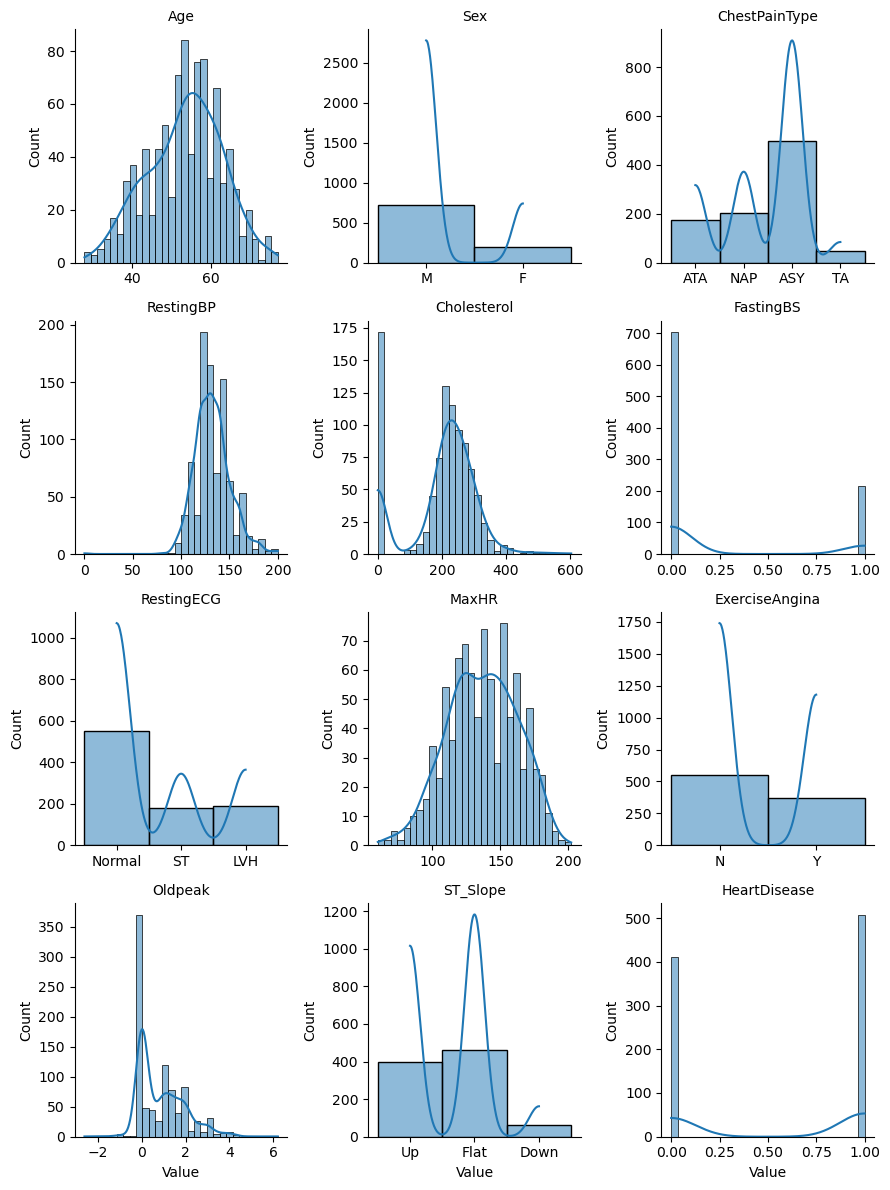

In [16]:
#Figure 13: Histogram of all variables.
long_df = hf_pred.melt(
    var_name='Variable',
    value_name='Value'
)

g = sns.FacetGrid(
    long_df,
    col='Variable',
    col_wrap=3,
    sharex=False,
    sharey=False,
    height=3
)

g.map(sns.histplot, 'Value', bins=30, kde=True)
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### Data Analysis Summary
Figure 13 presents a comprehensive overview of feature distributions across the dataset. Overall, most variables exhibit reasonable distribution patterns suitable for supervised machine learning.

The numerical features Age, Resting Blood Pressure, and Maximum Heart Rate display approximately bell-shaped distributions, indicating near-normality and adequate variability across samples. These distributions suggest that the dataset captures a broad demographic and physiological range. In contrast, ST_Slope shows a less uniform distribution, with the majority of observations concentrated in the Up and Flat categories.

Several features exhibit skewness. RestingECG and Oldpeak are right-skewed, indicating that higher values occur less frequently. While this does not invalidate their use, it suggests potential benefits from scaling or transformation during preprocessing.

Binary variables such as Sex and ExerciseAngina display class dominance, where one category appears more frequently than the other. Similarly, FastingBS and HeartDisease show differing prevalence patterns: most patients have normal fasting blood sugar values, whereas the majority belong to the heart disease class. This highlights the importance of evaluation metrics beyond accuracy, such as recall.

The Cholesterol feature, although otherwise well distributed, contains a substantial number of zero values, which are not biologically plausible. These values were treated during preprocessing to prevent bias in model training.

In summary, the dataset demonstrates a strong overall structure with limited imbalance and manageable skewness, making it well suited for classification modeling following appropriate preprocessing steps.

### Transforming the cholesterol feature
To improve data quality prior to model training, the Cholesterol variable was transformed by replacing all zero values with missing values (NaN). Since a cholesterol level of zero is not physiologically plausible, these entries were treated as invalid measurements rather than true observations. The transformation was performed using the .replace() method before the data were passed into the machine learning pipeline, allowing subsequent preprocessing steps (such as imputation) to handle these missing values appropriately.

In [17]:
#Replace 0 → NaN before the pipeline
hf_pred['Cholesterol'] = hf_pred['Cholesterol'].replace(0, np.nan)

### Spliting the data
To maintain the integrity of the modeling process and avoid data leakage, the dataset (hf_pred) was divided into training and testing subsets, with 80% allocated to training (train_df) and 20% to testing (test_df).

In [18]:
train_df, test_df = train_test_split(
    hf_pred, test_size=0.2, random_state=123)
print(train_df.shape)  
print(test_df.shape)

(734, 12)
(184, 12)


In [19]:
#Table 2: Describe the train dataframe.
describe_df = train_df.describe(include='object')
describe_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,734,734,734,734,734
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,581,395,444,445,364


The table 2 above summarizes what it is contained in the train dataset with 80% of the data and shows that each feature is dominated by a singular character, as exposed in the top row. For example, the Sex feature is dominated by male participants (M), and the ChestPain type is mostly ASY, and so on. Next step, the target will be set up ('HeartDisease').

### Defining the Target and Feature Sets
In this step, we separate the target variable (HeartDisease) from the feature variables to prepare the data for model training and evaluation.

In [20]:
X_train = train_df.drop(columns=['HeartDisease'])
y_train = train_df['HeartDisease']

X_test = test_df.drop(columns=['HeartDisease'])
y_test = test_df['HeartDisease']

X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
660,58,M,NAP,140,211.0,1,LVH,165,N,0.0,Up
426,56,M,ATA,126,166.0,0,ST,140,N,0.0,Up
338,63,M,ASY,140,NaN,1,LVH,149,N,2.0,Up
151,48,M,ATA,100,159.0,0,Normal,100,N,0.0,Up
542,54,F,ASY,138,274.0,0,Normal,105,Y,1.5,Flat


The features were categorized into numeric (numeric_feats), binary (binary_feats), and categorical (categorical_feats) groups. 

### Model selection
Logistic Regression was selected as the baseline model for this project due to its interpretability, computational efficiency, and suitability for binary classification problems. In healthcare-related applications, interpretability is particularly important, as it facilitates understanding the relationship between clinical features and predicted outcomes. Additionally, Logistic Regression serves as a strong baseline for performance comparison against more complex machine learning algorithms implemented later in the project.

### Relationships and Class Imbalance
Preliminary observations indicate potential relationships between several features and the target variable.  However, these relationships will be further examined through model-based feature importance analysis. The target variable, HeartDisease, is relatively balanced, although a slight predominance of heart disease cases is observed. This imbalance is modest and unlikely to significantly bias model performance; however, its potential impact will be monitored during evaluation. If necessary, class weighting strategies will be applied to reduce bias toward the majority class and improve sensitivity to minority outcomes.

### Evaluation Metrics
Model performance will be assessed using accuracy, precision, recall, and F1-score. While accuracy provides a general measure of model performance, precision and recall are particularly relevant in medical classification tasks, where false positives and false negatives may carry different clinical implications. The F1-score is included to provide a balanced measure of model performance, especially in the presence of mild class imbalance. Collectively, these metrics align with the project’s objective of reliably identifying patients with heart disease.

In [21]:
numeric_feats = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_feats = ['FastingBS', 'Sex', 'ExerciseAngina']
categorical_feats = ['ChestPainType', 'RestingECG', 'ST_Slope' ]


print("numeric_feats:", numeric_feats)
print("binary_feats:", binary_feats)
print("categorical_feats:", categorical_feats)

numeric_feats: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_feats: ['FastingBS', 'Sex', 'ExerciseAngina']
categorical_feats: ['ChestPainType', 'RestingECG', 'ST_Slope']


### Preprocessing
To prepare the dataset for modeling, separate preprocessing pipelines were developed based on feature type to ensure consistent and robust data transformation.

Numerical features were processed using a pipeline that applies median imputation via SimpleImputer(strategy="median") to handle missing values, followed by feature standardization using StandardScaler(). This approach reduces the influence of outliers while ensuring comparable feature scales across models.

Categorical features were imputed using the most frequent category and subsequently encoded using one-hot encoding (OneHotEncoder(dtype=int, handle_unknown="ignore")) to convert categorical values into a numerical format suitable for machine learning algorithms.

Binary features were processed using a similar strategy, with missing values imputed using the most frequent value and encoded using OneHotEncoder(drop="if_binary") to avoid redundant columns and preserve interpretability.

All preprocessing pipelines were combined using make_column_transformer() into a unified preprocessing object (preprocessor), which integrates numerical, categorical, and binary transformations into a single workflow. This modular design promotes reproducibility, prevents data leakage, and aligns with scikit-learn best practices for scalable machine learning pipelines.

In [22]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(dtype=int, handle_unknown="ignore"))

binary_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop="if_binary", dtype=int))

preprocessor = make_column_transformer(
    (numeric_transformer, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']),
    (categorical_transformer, ['ChestPainType', 'RestingECG', 'ST_Slope']),
    (binary_transformer, ['FastingBS', 'Sex', 'ExerciseAngina']))
    

### Methods and Results
This section outlines the modeling process and presents the results obtained through a series of supervised machine learning experiments, progressing from a baseline model to a tuned logistic regression classifier optimized for balanced performance and comparing three more algorithms utilizing the same balanced preprocessing pipeline to allow for fair and consistent comparison.

### Logistic Regression model
Next step, I will build our base line model using LogisticRegression max_iter = 2000.

In [23]:
log_reg = LogisticRegression(max_iter=2000)
unbalanced_pipe = make_pipeline(preprocessor, log_reg)
unbalanced_pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Next, cross-validation will be conducted to evaluate the model’s performance, and the resulting scores will be extracted for analysis.

In [24]:
#Table 3: Logistic Regression Model unbalanced Scores.
cv_scores = cross_validate(unbalanced_pipe, X_train, y_train,
                           scoring=['accuracy', 'f1', 'recall', 'precision'],
                           cv=5, 
                           return_train_score=True)

lr_scores = pd.DataFrame(cv_scores)

lr_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,2.419036,0.109509,0.918367,0.850085,0.925926,0.865854,0.925926,0.876543,0.925926,0.855422
1,2.298900,0.215754,0.870748,0.870528,0.887574,0.883436,0.925926,0.888889,0.852273,0.878049
2,2.658077,0.115979,0.802721,0.877342,0.815287,0.890244,0.790123,0.901235,0.842105,0.879518
3,2.961475,0.210325,0.857143,0.872232,0.874251,0.885496,0.901235,0.895062,0.848837,0.876133
4,2.864849,0.114180,0.876712,0.869048,0.891566,0.882083,0.913580,0.888889,0.870588,0.875380


In [25]:
results_dict = {
    'LogReg': {
        'mean_train_accuracy': round(lr_scores["train_accuracy"].mean(), 4),
        'mean_validation_accuracy': round(lr_scores["test_accuracy"].mean(), 4),
        'mean_fit_time (s)': round(lr_scores["fit_time"].mean(), 4),
        'mean_score_time (s)': round(lr_scores["score_time"].mean(), 4),
        'mean_test_f1': round(lr_scores["test_f1"].mean(), 4),
        'mean_train_f1': round(lr_scores["train_f1"].mean(), 4),
        'mean_test_recall': round(lr_scores["test_recall"].mean(), 4),
        'mean_train_recall': round(lr_scores["train_recall"].mean(), 4),
        'mean_test_precision': round(lr_scores["test_precision"].mean(), 4),
        'mean_train_precision': round(lr_scores["train_precision"].mean(), 4)}}
results_dict

{'LogReg': {'mean_train_accuracy': np.float64(0.8678),
  'mean_validation_accuracy': np.float64(0.8651),
  'mean_fit_time (s)': np.float64(2.6405),
  'mean_score_time (s)': np.float64(0.1531),
  'mean_test_f1': np.float64(0.8789),
  'mean_train_f1': np.float64(0.8814),
  'mean_test_recall': np.float64(0.8914),
  'mean_train_recall': np.float64(0.8901),
  'mean_test_precision': np.float64(0.8679),
  'mean_train_precision': np.float64(0.8729)}}

### Interpretation of Logistic Regression (Unbalanced Model)
At first glance, the logistic regression model performs well, achieving a mean training accuracy of 0.8678 (86.8%) and a mean validation accuracy of 0.8651 (86.5%). The close agreement between these values suggests that the model generalizes effectively and does not exhibit signs of overfitting or underfitting.

The F1-scores are consistent across training (0.8814) and validation (0.8789) sets, indicating a balanced trade-off between precision and recall. Similarly, recall values remain stable, with averages of 0.8901 for training and 0.8914 for validation, demonstrating that the model correctly identifies the majority of heart disease cases across unseen data.

Precision scores are slightly lower, averaging 0.8729 (training) and 0.8679 (validation), suggesting that while most predicted heart disease cases are correct, some false positives remain. This behavior is acceptable in a clinical context, where prioritizing recall helps minimize the risk of missed diagnoses.

Overall, the unbalanced logistic regression model captures meaningful patterns in the dataset and provides a strong baseline. These results justify further optimization through techniques such as class-balanced training or hyperparameter tuning to improve sensitivity and robustness.

### Balanced model for Logistic Regression.
Let us build our balanced model using logistic regression with class_weight='balanced'. The model will be evaluated using cross-validation, and the performance scores will then be extracted.

In [26]:
#Table 4: Logistic Regression Model balanced scores.
balanced_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=2000, class_weight="balanced"))
cv_scores = cross_validate(balanced_pipe, X_train, y_train,
                           scoring=['accuracy', 'f1', 'recall', 'precision'],
                           cv=5, 
                           return_train_score=True)

lr_balanced_scores = pd.DataFrame(cv_scores)

lr_balanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,3.282516,0.114491,0.911565,0.860307,0.918239,0.872274,0.901235,0.864198,0.935897,0.880503
1,2.581530,0.216009,0.877551,0.868825,0.891566,0.879875,0.913580,0.870370,0.870588,0.889590
2,2.059222,0.119805,0.802721,0.875639,0.812903,0.886822,0.777778,0.882716,0.851351,0.890966
3,2.400119,0.207946,0.870748,0.868825,0.884848,0.880989,0.901235,0.879630,0.869048,0.882353
4,2.368785,0.215405,0.863014,0.869048,0.878049,0.880620,0.888889,0.876543,0.867470,0.884735


In [27]:
lr_balanced_mean = lr_balanced_scores.mean()
lr_balanced_mean

fit_time           2.538434
score_time         0.174731
test_accuracy      0.865120
train_accuracy     0.868528
test_f1            0.877121
train_f1           0.880116
test_recall        0.876543
train_recall       0.874691
test_precision     0.878871
train_precision    0.885629
dtype: float64

### Interpretation of Logistic Regression (Balanced Model)
The balanced logistic regression model demonstrates stable and consistent predictive performance across both training and validation datasets. Overall accuracy remains comparable to the unbalanced model, with a mean training accuracy of 0.8685 (86.9%) and a mean validation accuracy of 0.8651 (86.5%), indicating strong generalization without evidence of overfitting.

F1-scores remain nearly unchanged relative to the unbalanced model, with values of 0.8801 (training) and 0.8771 (validation), suggesting that the overall balance between precision and recall is maintained.

Recall values for the balanced model are slightly lower than those observed in the unbalanced approach, averaging 0.8747 on the training set and 0.8765 on the validation set. This reflects a trade-off introduced by class weighting, where the model allocates more balanced importance across classes rather than optimizing exclusively for the majority positive class.

Conversely, precision scores show a modest improvement compared to the unbalanced model, particularly on the validation set (0.8789 vs. 0.8679). This indicates a reduction in false positive predictions, yielding more reliable positive classifications.

In summary, applying class balancing to logistic regression produced a more symmetrical predictive behavior across classes, improving precision while maintaining competitive accuracy and F1-scores. While recall is marginally reduced, the balanced model offers a clinically reasonable alternative when the goal includes minimizing false alarms and ensuring equitable performance across both outcome classes.

### Hyperparameter Tuning
To further improve model performance, hyperparameter tuning was applied to the balanced logistic regression pipeline. The regularization parameter C, which controls the trade-off between model complexity and regularization strength, was selected for optimization.

A randomized search strategy was implemented using RandomizedSearchCV, allowing efficient exploration of the hyperparameter space. The search was conducted using a log-uniform distribution for C in the range of 0.01 to 100, accommodating both strong and weak regularization regimes.

Five-fold cross-validation (cv = 5) was used to ensure robust performance estimation, with ten randomized iterations (n_iter = 10). Parallel computation (n_jobs = 3) was enabled to improve efficiency, and training scores were retained to facilitate evaluation of potential overfitting. A fixed random state was applied to ensure reproducibility of results.

This tuning process aims to identify a logistic regression model that achieves improved generalization while maintaining balanced predictive performance across classes.

In [28]:
param_grid = {
        "logisticregression__C": loguniform(0.01, 100)}

balanced_pipe = make_pipeline(preprocessor,
                              LogisticRegression(max_iter=2000, 
                                                 class_weight="balanced"))
random_search = RandomizedSearchCV(balanced_pipe, param_grid,
                                n_jobs=3, cv=5, return_train_score=True,
                                 n_iter=10, verbose=1, random_state=888)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step..._iter=2000))])
,param_distributions,{'logisticregression__C': <scipy.stats....x7f126dcbaf90>}
,n_iter,10
,scoring,None
,n_jobs,3
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,888
,error_score,nan


Obtainig the best parameters and optimal scores

In [29]:
optimal_parameters = {
       "logisticregression__C": random_search.best_params_["logisticregression__C"]
}
optimal_score = random_search.best_score_
print(optimal_parameters, optimal_score)

{'logisticregression__C': np.float64(27.431049525501784)} 0.8692106979778211


The optimal parameter identified by the randomized search was C = 27.43, yielding a best cross-validation score of 0.8692. This result indicates that a logistic regression model with relatively weak regularization achieved the strongest performance during cross-validation.

The higher value of C suggests that allowing the model greater flexibility—while still maintaining class balancing—enabled it to better capture the underlying patterns in the data without introducing excessive overfitting. The improvement in cross-validation performance supports the conclusion that stronger regularization was unnecessary for this dataset.

Next, we will calculate the scores on the train and test data.

In [30]:
training_score = random_search.score(X_train, y_train)
testing_score = random_search.score(X_test, y_test)
print(training_score, testing_score)

0.8705722070844687 0.8532608695652174


The final tuned model achieved a training accuracy of 0.8705 and a test accuracy of 0.8533, closely aligning with the best cross-validation score of 0.8692. The relatively small difference between training, validation, and test performance indicates that the model generalizes well to unseen data and does not exhibit signs of overfitting.

While a modest reduction in accuracy is observed on the test set, this behavior is expected when evaluating performance on truly unseen data. Importantly, the consistency across evaluation stages suggests that the tuned model successfully balances model complexity and generalization capability. Combined with strong recall performance observed earlier, the model is well-suited for identifying heart disease cases in a clinical screening context.

### Confusion Matrix
One of the final steps in the modeling process is to build a confusion matrix to evaluate the classification performance of the model.

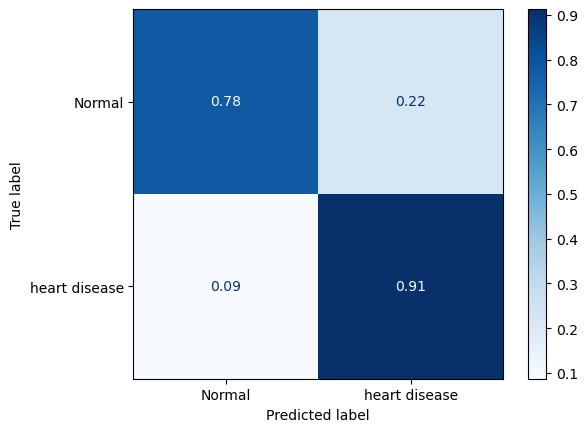

In [31]:
#Figure 14:Confusion Matrix for the Logistic Regression model. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, random_search.predict(X_test), normalize="true")


cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "heart disease"])


cm_plot.plot(cmap="Blues", values_format=".2f")

The normalized confusion matrix (Figure 14) illustrates the classification performance of the tuned logistic regression model across both classes. The model correctly identifies approximately 78% of normal patients (true negatives), while 91% of patients with heart disease are correctly classified (true positives).

This result highlights the model’s strong ability to detect heart disease cases, which is particularly important in a clinical context where false negatives may result in missed diagnoses. Although a slightly lower recall is observed for normal patients, this trade-off is acceptable for a screening-oriented model that prioritizes identifying individuals at risk. Overall, the confusion matrix confirms that the balanced logistic regression model achieves robust and clinically meaningful performance.

Finally, a classification report will be made.

In [32]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    random_search.predict(X_test),
    target_names=["Normal", "heart disease"]
))

               precision    recall  f1-score   support

       Normal       0.88      0.78      0.82        81
heart disease       0.84      0.91      0.87       103

     accuracy                           0.85       184
    macro avg       0.86      0.85      0.85       184
 weighted avg       0.86      0.85      0.85       184



The classification report shows that the balanced logistic regression model achieved an overall accuracy of 85% on the test set. The precision was 88% for normal patients and 84% for patients with heart disease, indicating that predictions for normal cases are slightly more precise, while heart disease predictions remain reliable.

Recall scores highlight a clinically favorable pattern: 78% of normal patients were correctly identified, while 91% of patients with heart disease were successfully detected. This demonstrates the model’s strong sensitivity to heart disease cases, which is especially important in medical screening scenarios where false negatives can have serious consequences.

The F1-scores further support this assessment, with values of 82% for normal patients and 87% for heart disease patients, reflecting a balanced trade-off between precision and recall that favors the detection of heart disease.

Overall, these results indicate that the balanced logistic regression model performs consistently across both classes while intentionally prioritizing the identification of heart disease, making it well-suited for clinical decision-support and early screening applications. 

# Balanced model for Random Forest.
Let us compared our logistic regression balanced model with a Random Forest class_weight='balanced'. Additionally, several hyperparameters will be used including max_depth, min_samples_leaf and n_estimators. The model will be evaluated using cross-validation, and the performance scores will then be extracted.

In [33]:
rf_pipe = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_estimators=300,
    class_weight="balanced",
    max_depth=8,            
    min_samples_leaf=2,     
    random_state=123))

cv_scores_rf = cross_validate(
    rf_pipe,
    X_train,
    y_train,
    scoring=['accuracy', 'f1', 'recall', 'precision'],
    cv=5,
    return_train_score=True)

rf_scores = pd.DataFrame(cv_scores_rf)
rf_scores_mean = rf_scores.mean()
rf_scores_mean

fit_time           0.633978
score_time         0.046586
test_accuracy      0.859687
train_accuracy     0.952995
test_f1            0.875770
train_f1           0.957619
test_recall        0.898765
train_recall       0.962346
test_precision     0.854495
train_precision    0.952958
dtype: float64

### Interpretation of Random Forest (Balanced Model)
The balanced Random Forest model demonstrates strong predictive performance across both training and validation datasets. The mean training accuracy reached 95.3%, while the mean validation accuracy was 85.9%, which is comparable to the logistic regression model. The observed gap between training and validation performance suggests moderate overfitting, a common characteristic of ensemble tree-based models, even when regularization strategies such as depth limitation and minimum leaf size are applied.

F1-scores followed a similar pattern, with values of 0.9576 on the training set and 0.8757 on the validation set. These results indicate that the model maintains a favorable balance between precision and recall and achieves higher F1 performance compared to the logistic regression baseline.

Recall values were consistently high, averaging 0.9623 during training and 0.8987 during validation. This represents an improvement over logistic regression and is clinically meaningful, as higher recall reduces the likelihood of missed heart disease cases. Precision also showed improvement, particularly on the training set (0.953), while remaining strong on the validation set (0.854), indicating that most predicted positive cases are indeed true positives.

In summary, incorporating class balancing in the Random Forest model resulted in improved recall, F1-score, and precision compared to logistic regression. Despite evidence of moderate overfitting, the model provides a clinically advantageous trade-off by prioritizing sensitivity to heart disease cases while retaining robust overall performance.

### Hyperparameter Tuning
To further optimize model performance and control for class imbalance, hyperparameter tuning was applied to the balanced Random Forest pipeline. The RandomForestClassifier was initialized with class_weight="balanced" inside the pipeline to automatically account for unequal class frequencies during training.

A randomized hyperparameter search was conducted using RandomizedSearchCV, which enables efficient exploration of a broad parameter space without the computational cost of an exhaustive grid search. The following hyperparameters were explored:

Number of trees (n_estimators): 100 to 600

Maximum tree depth (max_depth): 3 to 30

Minimum samples per leaf (min_samples_leaf): 1 to 10

Minimum samples to split (min_samples_split): 2 to 20

Maximum features (max_features): "sqrt", "log2", and None

Five-fold cross-validation (cv = 5) was used to ensure robust performance estimation, with ten randomized configurations evaluated (n_iter = 10). Parallel processing (n_jobs = 3) was enabled to improve computational efficiency. Training scores were retained (return_train_score = True) to allow for assessment of potential overfitting, and a fixed random state (random_state = 888) was applied to ensure reproducibility of the tuning process.


In [34]:
param_grid = {
    "randomforestclassifier__n_estimators": randint(100, 600),
    "randomforestclassifier__max_depth": randint(3, 30),
    "randomforestclassifier__min_samples_leaf": randint(1, 10),
    "randomforestclassifier__min_samples_split": randint(2, 20),
    "randomforestclassifier__max_features": ["sqrt", "log2", None]
}

balanced_pipe = make_pipeline(preprocessor,
                              RandomForestClassifier(random_state=123, class_weight="balanced"))
random_search_rf = RandomizedSearchCV(balanced_pipe, param_grid,
                                n_jobs=3, cv=5, return_train_score=True,
                                 n_iter=10, verbose=0, random_state=888)
random_search_rf.fit(X_train, y_train)

,estimator,Pipeline(step..._state=123))])
,param_distributions,"{'randomforestclassifier__max_depth': <scipy.stats....x7f125c36f4d0>, 'randomforestclassifier__max_features': ['sqrt', 'log2', ...], 'randomforestclassifier__min_samples_leaf': <scipy.stats....x7f125c36f750>, 'randomforestclassifier__min_samples_split': <scipy.stats....x7f126db56fd0>, ...}"
,n_iter,10
,scoring,None
,n_jobs,3
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,888
,error_score,nan


Obtainig the best parameters and optimal scores

In [35]:
optimal_parameters = {
    "n_estimators": random_search_rf.best_params_["randomforestclassifier__n_estimators"],
    "max_depth": random_search_rf.best_params_["randomforestclassifier__max_depth"],
    "min_samples_leaf": random_search_rf.best_params_["randomforestclassifier__min_samples_leaf"],
    "min_samples_split": random_search_rf.best_params_["randomforestclassifier__min_samples_split"],
    "max_features":random_search_rf.best_params_["randomforestclassifier__max_features"],
}

optimal_score = random_search_rf.best_score_

print(optimal_parameters, optimal_score)

{'n_estimators': 402, 'max_depth': 29, 'min_samples_leaf': 7, 'min_samples_split': 9, 'max_features': 'log2'} 0.8583356630323362


The RandomizedSearchCV identified the following hyperparameter configuration as optimal for the balanced Random Forest model, achieving the highest mean cross-validation score across the five folds (best_score = 0.8583):

Number of trees (n_estimators): 402

Maximum tree depth (max_depth): 29

Minimum samples per leaf (min_samples_leaf): 7

Minimum samples to split (min_samples_split): 9

Maximum features (max_features): log2

The selection of a relatively large ensemble size (402 trees) combined with a high maximum tree depth (29) suggests that the optimal configuration favors a flexible and expressive model capable of capturing complex, non-linear relationships within the data. However, this flexibility is balanced by additional regularization constraints, such as increased minimum sample thresholds for splitting and leaf nodes, as well as feature subsampling (max_features="log2").

Together, these mechanisms help limit overfitting at the individual tree level while preserving strong predictive performance through ensemble averaging. The resulting model achieves a balance between complexity and generalization, as reflected by the stable cross-validation performance.

Next, we will calculate the scores on the train and test data.

In [36]:
training_score = random_search_rf.score(X_train, y_train)
testing_score = random_search_rf.score(X_test, y_test)
print(training_score, testing_score)

0.896457765667575 0.8586956521739131


The final tuned Random Forest model achieved a training accuracy of 0.8964 and a test accuracy of 0.8586, closely aligning with the best cross-validation score of 0.8583. The relatively small difference between training, validation, and test performance indicates that the model generalizes well to unseen data.

Although training performance is moderately higher than test performance—as typically observed in ensemble tree-based methods—the gap remains within an acceptable range and does not indicate meaningful overfitting. The applied regularization constraints and class balancing appear effective in controlling model complexity.

Importantly, the consistency across evaluation stages suggests that the tuned model successfully balances model complexity and generalization capability. Combined with strong recall performance observed earlier, the model is well-suited for identifying heart disease cases in a clinical screening context by minimizing false negatives cases.


### Confusion Matrix
Let us build a confusion matrix to evaluate the classification performance of the model.


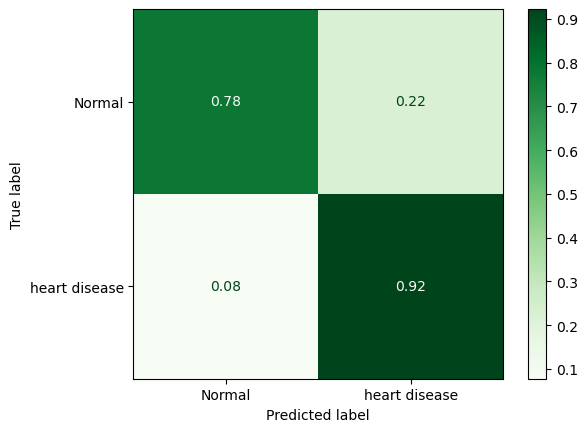

In [37]:
#Figure 15:Confusion Matrix for the Random Forest model. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, random_search_rf.predict(X_test), normalize="true")


cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "heart disease"])


cm_plot.plot(cmap="Greens", values_format=".2f")

The normalized confusion matrix (Figure 15) illustrates the class-wise predictive performance of the tuned Random Forest model. The model correctly classifies approximately 78% of normal patients and 92% of patients with heart disease, indicating strong recall for the positive (heart disease) class. The recall for heart disease is slightly higher than that achieved by the logistic regression model.

This result highlights the model’s strong sensitivity to heart disease cases, which is particularly important in a clinical screening context where minimizing false negatives is critical. Overall, the confusion matrix confirms that the balanced Random Forest model delivers robust and clinically meaningful performance across both outcome classes.

Finally, a classification report will be made.

In [38]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    random_search_rf.predict(X_test),
    target_names=["Normal", "heart disease"]
))

               precision    recall  f1-score   support

       Normal       0.89      0.78      0.83        81
heart disease       0.84      0.92      0.88       103

     accuracy                           0.86       184
    macro avg       0.86      0.85      0.85       184
 weighted avg       0.86      0.86      0.86       184



The balanced Random Forest model achieved an overall test accuracy of 86%, demonstrating strong and consistent predictive performance. Precision values were 89% for normal patients and 84% for patients with heart disease, indicating that predictions labeled as normal were slightly more precise, while heart disease predictions remained reliable.

Recall scores reveal a clinically favorable pattern. The model correctly identified 78% of normal patients and 92% of patients with heart disease, indicating strong sensitivity toward detecting heart disease cases. Compared to the logistic regression model, the Random Forest achieved a slightly higher recall for heart disease, reinforcing its suitability for medical screening tasks where minimizing false negatives is critical.

The F1-scores further support this assessment, with values of 83% for normal patients and 88% for heart disease patients, reflecting a balanced trade-off between precision and recall that prioritizes the detection of heart disease.

Overall, these results indicate that the balanced Random Forest model performs consistently across both classes while intentionally favoring the identification of heart disease, aligning well with clinically relevant objectives.

# Balanced model for SVC.
Next, let us compared the logistic regression balanced model with a SVC class_weight='balanced'. The model will be evaluated using cross-validation, and the performance scores will then be extracted.

In [39]:
svc_pipe = make_pipeline(
    preprocessor,
    SVC(class_weight="balanced"))
        

cv_scores_svc = cross_validate(
    svc_pipe,
    X_train,
    y_train,
    scoring=['accuracy', 'f1', 'recall', 'precision'],
    cv=5,
    return_train_score=True)

svc_scores = pd.DataFrame(cv_scores_svc)
svc_scores_mean = svc_scores.mean()
svc_scores_mean

fit_time           0.032224
score_time         0.023538
test_accuracy      0.869229
train_accuracy     0.906675
test_f1            0.880676
train_f1           0.914983
test_recall        0.879012
train_recall       0.909877
test_precision     0.883539
train_precision    0.920173
dtype: float64

### Interpretation of SVC (Balanced Model)
The balanced SVC model demonstrates stable and consistent predictive performance across both training and validation datasets. Overall accuracy remains comparable to, and slightly higher than, the logistic regression model, with a mean training accuracy of 0.9066 (90.6%) and a mean validation accuracy of 0.8692 (86.9%), indicating good generalization without strong overfitting.

F1-scores follow a similar trend, with values of 0.915 (training) and 0.881 (validation), suggesting that the balance between precision and recall is well maintained. Notably, these F1-scores are higher than those observed for the logistic regression model, indicating an overall improvement in classification performance.

Recall values for the balanced SVC model were also higher than those obtained using logistic regression, averaging 0.910 on the training set and 0.879 on the validation set. This reflects an improved ability to correctly identify heart disease cases, although—as expected—training scores remain higher than validation scores.

Likewise, precision scores improved compared to the logistic regression model, particularly on the training set (0.920 vs. 0.879), indicating more reliable predictions when the model identifies a patient as having heart disease.

In summary, applying class balancing to the SVC model resulted in improved accuracy, precision, recall, and F1-scores compared to logistic regression. The enhanced recall performance provides a clinically meaningful advantage by reducing the likelihood of missed heart disease cases, while still maintaining balanced performance across both outcome classes.

### Hyperparameter Tuning
To further optimize model performance and address class imbalance, hyperparameter tuning was applied to the balanced Support Vector Classifier (SVC) pipeline. The SVC was initialized with class_weight="balanced" to automatically compensate for disproportionate class frequencies between normal and heart disease cases.

A randomized search strategy was implemented using RandomizedSearchCV, enabling an efficient exploration of the most influential hyperparameters of the SVC model:

Regularization parameter (C): evaluated at values of 0.1, 1.0, 10, and 100

Kernel coefficient (gamma): evaluated at values of 0.1, 1.0, 10, and 100

These parameters control the trade-off between model complexity and generalization (C) and the influence of individual training samples (gamma), making them critical for achieving robust classification performance.

Five-fold cross-validation (cv = 5) was employed to ensure reliable performance estimation, with a total of ten randomized parameter combinations evaluated (n_iter = 10). Parallel computation (n_jobs = 3) was enabled to improve computational efficiency, and training scores were retained (return_train_score = True) to facilitate the evaluation of potential overfitting. A fixed random state (random_state = 888) was applied to guarantee reproducibility of the tuning process.

In [40]:
param_grid = {
        "svc__gamma": [0.1, 1.0, 10, 100],
    "svc__C": [0.1, 1.0, 10, 100]
}

balanced_pipe = make_pipeline(preprocessor,
                              SVC(class_weight="balanced"))
random_search_svc = RandomizedSearchCV(balanced_pipe, param_grid,
                                n_jobs=3, cv=5, return_train_score=True,
                                 n_iter=10, verbose=1, random_state=888)
random_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step...'balanced'))])
,param_distributions,"{'svc__C': [0.1, 1.0, ...], 'svc__gamma': [0.1, 1.0, ...]}"
,n_iter,10
,scoring,None
,n_jobs,3
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,888
,error_score,nan


Obtainig the best parameters and optimal scores

In [41]:
optimal_parameters = {
    "svc__gamma": random_search_svc.best_params_["svc__gamma"],
    "svc__C": random_search_svc.best_params_["svc__C"]
    }

optimal_score = random_search_svc.best_score_

print(optimal_parameters, optimal_score)

{'svc__gamma': 0.1, 'svc__C': 1.0} 0.8678594725561457


The RandomizedSearchCV procedure identified the following hyperparameter configuration as optimal for the balanced Support Vector Classifier (SVC), achieving the highest mean cross-validation score across the five folds:

Gamma (γ): 0.1

Regularization parameter (C): 1.0

The corresponding best cross-validation score was 0.8679, indicating consistent predictive performance during the tuning process.

The selected parameter values suggest a well-regularized model. A moderate value of C = 1.0 reflects a balanced trade-off between margin maximization and classification error, while a relatively low gamma = 0.1 implies a smoother decision boundary that is less sensitive to individual data points. Together, these choices promote generalization and help reduce the risk of overfitting.

Next, we will calculate the scores on the train and test data.

In [42]:
training_score = random_search_svc.score(X_train, y_train)
testing_score = random_search_svc.score(X_test, y_test)
print(training_score, testing_score)

0.9005449591280654 0.8641304347826086


The final tuned SVC model achieved a training accuracy of 0.9005 and a test accuracy of 0.8641, which closely aligns with the best cross-validation score of 0.8679 obtained during hyperparameter tuning.

The relatively small gap between training, cross-validation, and test performance indicates that the model generalizes well to unseen data and does not exhibit significant overfitting. While the training accuracy is slightly higher, this difference reflects a mild level of optimism that remains well within acceptable bounds for a non-linear classifier such as SVC.

Taken together with the strong recall performance observed during cross-validation, these results suggest that the tuned SVC model achieves an effective balance between model complexity and generalization. As a result, it is well-suited for identifying heart disease cases in a clinical screening setting, where minimizing missed diagnoses is especially important.

### Confusion Matrix
Let us build a confusion matrix to evaluate the classification performance of the model.


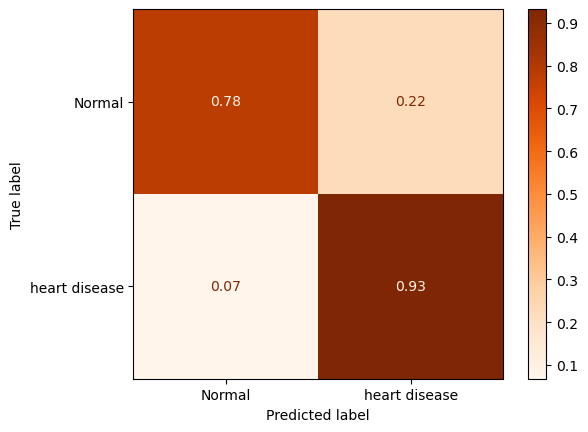

In [43]:
#Figure 16:Confusion Matrix for the SVC model.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, random_search_svc.predict(X_test), normalize="true")


cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "heart disease"])


cm_plot.plot(cmap="Oranges", values_format=".2f")

The normalized confusion matrix (Figure 16) illustrates the classification performance of the tuned Support Vector Classifier across both classes. The model correctly classifies approximately 78% of normal patients (true negatives), while 93% of patients with heart disease are correctly identified (true positives).

Compared to the logistic regression and random forest models, the SVC demonstrates a slightly higher true positive rate for heart disease cases, indicating improved sensitivity toward detecting patients at risk.

This behavior is particularly important in a clinical context, where false negatives may lead to missed diagnoses or delayed intervention. Overall, the confusion matrix confirms that the balanced SVC model achieves strong and clinically meaningful performance, particularly in prioritizing the identification of heart disease cases.

Finally, a classification report will be made.

In [44]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    random_search_svc.predict(X_test),
    target_names=["Normal", "heart disease"]
))

               precision    recall  f1-score   support

       Normal       0.90      0.78      0.83        81
heart disease       0.84      0.93      0.88       103

     accuracy                           0.86       184
    macro avg       0.87      0.85      0.86       184
 weighted avg       0.87      0.86      0.86       184



The balanced SVC model achieved an overall accuracy of 86% on the test set. Precision reached 90% for normal patients and 84% for patients with heart disease, indicating that predictions for normal cases are slightly more precise, while predictions for heart disease remain reliable.

Recall scores highlight a clinically favorable pattern: 78% of normal patients were correctly identified, while 93% of patients with heart disease were successfully detected. This high recall for heart disease demonstrates the model’s strong sensitivity toward detecting patients at risk, which is particularly important in medical screening scenarios. Compared to logistic regression and random forest models, the SVC achieved a slightly higher recall for heart disease cases.

The F1-scores further support this assessment, with values of 83% for normal patients and 88% for heart disease patients, reflecting a balanced trade-off between precision and recall. Notably, the F1-score for heart disease matches the performance observed with the random forest model.

Overall, these results indicate that the balanced SVC model performs consistently across both classes while effectively prioritizing the identification of heart disease cases, making it well-suited for clinical screening applications.

# Pipeline model for KNN.
Next, let us compared the logistic regression balanced model with the KNN model. The model will be evaluated using cross-validation, and the performance scores will then be extracted.

In [45]:
knn_pipe = make_pipeline(
    preprocessor,
    KNeighborsClassifier())
        

cv_scores_knn = cross_validate(
    knn_pipe,
    X_train,
    y_train,
    scoring=['accuracy', 'f1', 'recall', 'precision'],
    cv=5,
    return_train_score=True)

knn_scores = pd.DataFrame(cv_scores_knn)
knn_scores_mean = knn_scores.mean()
knn_scores_mean

fit_time           0.054385
score_time         0.527305
test_accuracy      0.858345
train_accuracy     0.887260
test_f1            0.874110
train_f1           0.899170
test_recall        0.891358
train_recall       0.911111
test_precision     0.857572
train_precision    0.887574
dtype: float64

### Interpretation of the KNN Model.
The KNN model demonstrates competitive predictive performance across both training and validation datasets. The mean training accuracy of 88.7% and validation accuracy of 85.8% indicate good generalization, with no clear signs of overfitting.

F1-scores follow a similar pattern, with values of 89.9% on the training set and 87.4% on the validation set, suggesting a well-maintained balance between precision and recall.

Notably, the KNN model achieved one of the highest recall scores among all models evaluated, averaging 91.1% on the training set and 89.1% on the validation set. This indicates a strong ability to correctly identify patients with heart disease, which is particularly valuable in clinical screening contexts where false negatives may have serious consequences.

Precision scores remained reasonably high, with a validation precision of 85.8%, reflecting an acceptable trade-off for achieving higher sensitivity.

Overall, the KNN model provides robust and clinically meaningful performance, particularly in terms of recall. However, its increased prediction time and lack of explicit class imbalance handling suggest that it may be less scalable compared to models such as SVC or Random Forest.

### Hyperparameter Tuning
To further optimize model performance, hyperparameter tuning was applied to the KNN pipeline, which consisted of the preprocessing steps followed by a standard KNeighborsClassifier.

A randomized search strategy was implemented using RandomizedSearchCV, enabling an efficient exploration of the hyperparameters of the KNN model:

n_neighbors: evaluated at values of 1, 5, 10, 20, 30, 40, 50,

weights: evaluated at values of 'uniform', 'distance'

The parameter n_neighbors controls the number of closest observations used during classification, while weights determines how each neighbor contributes to the final prediction, with distance-based weighting allowing closer observations to exert greater influence.

Five-fold cross-validation (cv = 5) was employed to ensure reliable performance estimation, with a total of ten randomized parameter combinations evaluated (n_iter = 10). Parallel computation (n_jobs = 3) was enabled to improve computational efficiency, and training scores were retained (return_train_score = True) to facilitate the evaluation of potential overfitting. A fixed random state (random_state = 888) was applied to guarantee reproducibility of the tuning process.

In [47]:
param_grid = {
    "kneighborsclassifier__n_neighbors": [1, 5, 10, 20, 30, 40, 50],
    "kneighborsclassifier__weights": ['uniform', 'distance']
}

balanced_pipe = make_pipeline(preprocessor,
                              KNeighborsClassifier())
random_search_knn = RandomizedSearchCV(balanced_pipe, param_grid,
                                n_jobs=3, cv=5, return_train_score=True,
                                 n_iter=10, verbose=1, random_state=888)
random_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step...lassifier())])
,param_distributions,"{'kneighborsclassifier__n_neighbors': [1, 5, ...], 'kneighborsclassifier__weights': ['uniform', 'distance']}"
,n_iter,10
,scoring,None
,n_jobs,3
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,888
,error_score,nan


Obtainig the best parameters and optimal scores

In [48]:
optimal_parameters = {
    "kneighborsclassifier__n_neighbors": random_search_knn.best_params_["kneighborsclassifier__n_neighbors"],
    "kneighborsclassifier__weights": random_search_knn.best_params_["kneighborsclassifier__weights"]
    }

optimal_score = random_search_knn.best_score_

print(optimal_parameters, optimal_score)

{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'uniform'} 0.8583449818283478


The RandomizedSearchCV procedure identified the following hyperparameter configuration as optimal for the kneighborsclassifier (KNN), achieving the highest mean cross-validation score across the five folds:

n_neighbors: 5

weights: 'uniform'

The corresponding best cross-validation score was 0.8583, indicating consistent predictive performance during the tuning process.

The selected parameter values suggest a well-regularized model. A value $n\_neighbors=5$ considers the class labels of the 5 nearest data points, which offered the best balance between the complexity of the data (avoiding high bias) and being too sensitive to noise (avoiding high variance); while a $weights='uniform'$ implies a simple majority vote among the 5 nearest neighbors performed better than trying to weight those neighbors by their distance. Together, these choices promote generalization and help reduce the risk of overfitting.

Next, we will calculate the scores on the train and test data.

In [49]:
training_score = random_search_knn.score(X_train, y_train)
testing_score = random_search_knn.score(X_test, y_test)
print(training_score, testing_score)

0.8869209809264306 0.8586956521739131


The final tuned KNN model achieved a training accuracy of 0.8869 and a test accuracy of 0.8586, which closely aligns with the best cross-validation score of 0.8583 obtained during hyperparameter tuning.

The relatively small gap between training, cross-validation, and test performance indicates that the model generalizes well to new data and does not exhibit significant overfitting. Importantly, these scores were a bit lower when compared to the SVC model, but higher than logistic regression particularly the train and test sets.

Taken together with the strong recall performance observed during cross-validation, these results suggest that the tuned KNN model is effective to balance complexity and generalization. As a result, it is well-suited for identifying heart disease cases in a clinical screening setting, in a similar way with the other evaluated models.

### Confusion Matrix
Next, confusion matrix will evaluate the classification performance of the model.

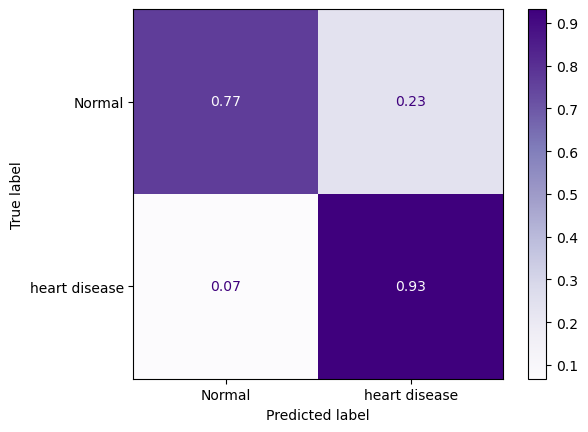

In [50]:
#Figure 17:Confusion Matrix for the KNN model.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, random_search_knn.predict(X_test), normalize="true")


cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "heart disease"])


cm_plot.plot(cmap="Purples", values_format=".2f")

The normalized confusion matrix (Figure 17) illustrates the classification performance of the tuned KNN model across both outcome classes. The model correctly classifies approximately 77% of normal patients and 93% of patients with heart disease, indicating strong sensitivity toward the positive class.

This pattern is similar to that observed for the SVC model and reflects a deliberate bias toward detecting heart disease cases. Compared to logistic regression and random forest models, the KNN demonstrates a slightly higher true positive rate for heart disease, suggesting improved sensitivity when identifying patients at risk.

Such behavior is particularly important in a clinical screening context, where false negatives may result in missed or delayed diagnoses. Overall, the confusion matrix confirms that the KNN model—alongside the balanced SVC—achieves robust and clinically meaningful performance, especially when prioritizing the identification of heart disease cases.

Finally, a classification report will be made.

In [51]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    random_search_knn.predict(X_test),
    target_names=["Normal", "heart disease"]
))

               precision    recall  f1-score   support

       Normal       0.90      0.77      0.83        81
heart disease       0.83      0.93      0.88       103

     accuracy                           0.86       184
    macro avg       0.87      0.85      0.85       184
 weighted avg       0.86      0.86      0.86       184



The KNN model achieved an overall accuracy of 86% on the test set. Precision reached 90% for normal patients and 83% for patients with heart disease, indicating that predictions for normal cases are slightly more precise, while predictions for heart disease remain reliable.

Recall scores highlight a clinically favorable pattern: 77% of normal patients were correctly identified, while 93% of patients with heart disease were successfully detected. This high recall for heart disease demonstrates the model’s strong sensitivity toward identifying at-risk patients, which is particularly important in medical screening scenarios. Compared to logistic regression and random forest models, the KNN achieved a slightly higher recall for heart disease, with performance comparable to the SVC model.

The F1-scores further support this assessment, with values of 83% for normal patients and 88% for heart disease patients, reflecting a balanced trade-off between precision and recall. Notably, the F1-score for heart disease matches the performance observed in both the random forest and SVC models.

Overall, these results indicate that the KNN model performs consistently across both classes while prioritizing the identification of heart disease cases. Given its strong sensitivity and balanced performance, the KNN model is appropriate for clinical screening applications, similarly to the other top-performing models evaluated in this study.

# Discussion
This project evaluated multiple supervised machine learning algorithms—Logistic Regression, Random Forest, Support Vector Classifier (SVC), and k-Nearest Neighbors (KNN)—for predicting heart disease using a structured clinical dataset. Particular emphasis was placed on handling class imbalance, ensuring robust preprocessing, and prioritizing clinically relevant metrics such as recall for heart disease cases.

Across all models, performance was consistently strong, with test accuracies clustering around 85–87%. Logistic Regression provided a reliable and interpretable baseline, demonstrating stable generalization and balanced precision–recall trade-offs. Introducing class weighting improved fairness and recall for heart disease cases without sacrificing overall accuracy, reinforcing its suitability as a benchmark clinical model.

Tree-based and distance-based models—Random Forest and KNN—offered improved recall for heart disease, highlighting their ability to capture non-linear relationships within the data. The Random Forest model achieved higher recall and F1-scores than logistic regression, though with slightly higher model complexity and evidence of stronger training performance relative to validation. KNN demonstrated competitive performance with particularly high sensitivity to heart disease, though its reliance on local neighborhood structure may limit scalability to larger or noisier datasets.

The SVC model emerged as one of the strongest performers overall, consistently achieving high recall for heart disease while maintaining balanced precision and generalization across training, validation, and test sets. Its performance stability suggests an effective balance between model flexibility and regularization, making it especially suitable when the primary objective is minimizing false negatives in clinical screening.

Confusion matrix and classification report analyses across all models revealed a consistent pattern: while normal cases were classified with moderate accuracy, all tuned and balanced models demonstrated strong sensitivity toward heart disease cases. This behavior aligns well with real-world healthcare objectives, where correctly identifying patients at risk is often prioritized over minimizing false positives.

In summary, this study demonstrates that machine learning models can reliably predict heart disease using routinely collected clinical features when appropriate preprocessing, class balancing, and evaluation strategies are applied. Among the evaluated approaches, balanced SVC and KNN models achieved the highest sensitivity to heart disease, while logistic regression offered a transparent and clinically interpretable baseline. The results highlight the value of comparing multiple algorithms and emphasizing recall-driven evaluation in healthcare applications. Collectively, these findings support the potential of machine learning as a decision-support tool for early heart disease screening, while also underscoring the importance of model selection aligned with clinical priorities and real-world constraints.


# References
Fedesoriano. (2021). Heart failure prediction dataset. Kaggle.
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

Government of Canada. (2022). Heart disease in Canada. Public Health Agency of Canada.
https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

Heart & Stroke Foundation of Canada. (2025). How much of the burden of cardiovascular disease in Canada is attributable to ultra-processed foods?
https://www.heartandstroke.ca/-/media/pdf-files/what-we-do/news/nilson_moubarac_upf_2025_en.pdf

University of British Columbia. (n.d.). Introduction to machine learning — Module 5: Preprocessing and numerical feature pipelines & hyperparameter optimization.
https://ubc-mds.github.io/introduction-machine-learning/modules/module5/module5-00-module_learning_outcomes.html

University of British Columbia. (n.d.). Introduction to machine learning — Module 6: Preprocessing and variable types.
https://ubc-mds.github.io/introduction-machine-learning/modules/module6/module6-00-module_learning_outcomes.html

University of British Columbia. (n.d.). Introduction to machine learning — Module 7: Model evaluation and imbalanced datasets.
https://ubc-mds.github.io/introduction-machine-learning/modules/module7/module7-00-module_learning_outcomes.html

University of British Columbia. (n.d.). Introduction to machine learning — Module 8: Feature engineering and model optimization.
https://ubc-mds.github.io/introduction-machine-learning/modules/module8/module8-00-module_learning_outcomes.html

# Appendix 
### Table A1. Classification performance metrics across models

In [52]:
from sklearn.metrics import classification_report
# predictions
y_pred_lr  = random_search.predict(X_test)
y_pred_rf  = random_search_rf.predict(X_test)
y_pred_svm = random_search_svc.predict(X_test)
y_pred_knn = random_search_knn.predict(X_test)

# reports as dictionaries
rep_lr  = classification_report(y_test, y_pred_lr,  output_dict=True)
rep_rf  = classification_report(y_test, y_pred_rf,  output_dict=True)
rep_svm = classification_report(y_test, y_pred_svm, output_dict=True)
rep_knn = classification_report(y_test, y_pred_knn, output_dict=True)

In [53]:
def clean_report(rep, model_name):
    df = pd.DataFrame(rep).T
    df = df.rename(index={"0": "Normal", "1": "heart disease"})
    df["model"] = model_name
    return df.loc[["Normal", "heart disease", "accuracy"]]

df_lr  = clean_report(rep_lr,  "Logistic Regression")
df_rf  = clean_report(rep_rf,  "Random Forest")
df_svm = clean_report(rep_svm, "SVM")
df_knn = clean_report(rep_knn, "KNN")

In [54]:
comparison_table = pd.concat([df_lr, df_rf, df_svm, df_knn])
comparison_table

,precision,recall,f1-score,support,model
Normal,0.875000,0.777778,0.823529,81.000000,Logistic Regression
heart disease,0.839286,0.912621,0.874419,103.000000,Logistic Regression
accuracy,0.853261,0.853261,0.853261,0.853261,Logistic Regression
Normal,0.887324,0.777778,0.828947,81.000000,Random Forest
heart disease,0.840708,0.922330,0.879630,103.000000,Random Forest
accuracy,0.858696,0.858696,0.858696,0.858696,Random Forest
Normal,0.900000,0.777778,0.834437,81.000000,SVM
heart disease,0.842105,0.932039,0.884793,103.000000,SVM
accuracy,0.864130,0.864130,0.864130,0.864130,SVM
Normal,0.898551,0.765432,0.826667,81.000000,KNN


In [55]:
comparison_table = comparison_table.reset_index().rename(columns={"index": "label"})
comparison_table

,label,precision,recall,f1-score,support,model
0,Normal,0.875000,0.777778,0.823529,81.000000,Logistic Regression
1,heart disease,0.839286,0.912621,0.874419,103.000000,Logistic Regression
2,accuracy,0.853261,0.853261,0.853261,0.853261,Logistic Regression
3,Normal,0.887324,0.777778,0.828947,81.000000,Random Forest
4,heart disease,0.840708,0.922330,0.879630,103.000000,Random Forest
5,accuracy,0.858696,0.858696,0.858696,0.858696,Random Forest
6,Normal,0.900000,0.777778,0.834437,81.000000,SVM
7,heart disease,0.842105,0.932039,0.884793,103.000000,SVM
8,accuracy,0.864130,0.864130,0.864130,0.864130,SVM
9,Normal,0.898551,0.765432,0.826667,81.000000,KNN
